# Introduction

This notebook is used to visualize the mood tracker data for users.

The mood tracker data is plotted in 2 different ways:

1. A stacked bar graph with data grouped by day of week which allows users to detect potential patterns in their moods based on the day of the week (e.g. On Mondays their moods are usually low, which may be due to the first day back to work/class)
    
2. A line graph to show user mood data over time. This provides the user with their mood changes over time which makes it easier to see if their mental health is improving or deteriorating.


# Section 1 - Generating dummy data

The first section demonstrates how the dummy data was generated for the mood tracker. 

The results are saved to a csv file which will be used in the second section to simplify plotting the data.

**Note: Section 1 can be skipped**

In [1]:
import random
import pandas as pd
import numpy as np
import datetime


today = datetime.date.today()
pd.set_option('display.max_row', 20)

In [ ]:
#Generate dummy data for 100 days including date, day of week, and mood tracker data 
moods = []
days = []
dates = []

for i in range(100):
    # 0 = very bad, 1 = bad, 2 = so-so, 3 = good, 4 = great
    moods.append(random.randint(0, 4)) 
    date = today - datetime.timedelta(days=i)
    dates.append(str(date))
    days.append(date.strftime('%A'))
    
moods.reverse()
days.reverse()
dates.reverse()

In [ ]:
userdata = {
    "moods": moods,
    "days": days,
    "dates": dates,
}

moods_df = pd.DataFrame(userdata)
# moods_df.to_csv('mood_dummy_data.csv', index=False)

moods_df.head()

# Section 2 - Plotting the data

The data is plotted in several different ways to help visualize the mood tracker data depending on the time period and purpose of the graphs

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# import the csv file and map the list with quiz answers to integers so it can be used with numpy
moods_df = pd.read_csv('mood_dummy_data.csv')

### Bar graph for days of week
A stacked bar chart groups the mood tracker data by the day of the week, allowing the user to spot patterns at a glance.

For example, it is easy to see that on Fridays there are 0 "horrible" mood entries, which could be because it is the last day of the week. Mondays & Tuesdays also have the highest number of "horrible" mood entries, possible because the user had to go back to work on Monday.


In [3]:
grouped_weekdays_df = moods_df.groupby(['days', 'moods']).size().unstack(fill_value=0)
grouped_weekdays_df

moods,0,1,2,3,4
days,,,,,
Friday,0,3,4,4,3
Monday,4,1,5,2,2
Saturday,2,4,3,1,4
Sunday,2,3,3,2,4
Thursday,1,3,3,3,5
Tuesday,4,1,3,2,4
Wednesday,2,3,3,4,3


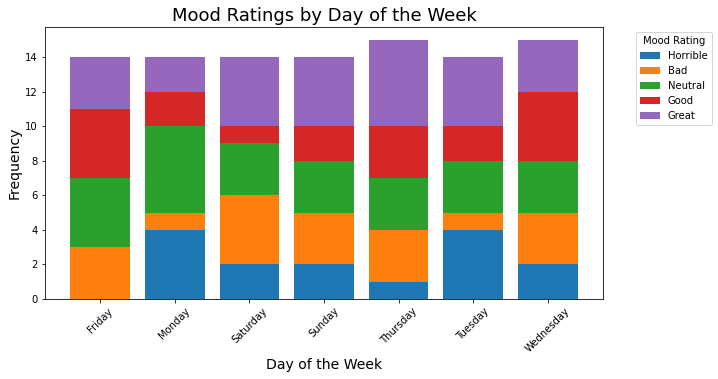

In [4]:
# Stacked bar chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(grouped_weekdays_df.index, grouped_weekdays_df[0], label='Horrible')
ax.bar(grouped_weekdays_df.index, grouped_weekdays_df[1], bottom=grouped_weekdays_df[0], label='Bad')
ax.bar(grouped_weekdays_df.index, grouped_weekdays_df[2], bottom=grouped_weekdays_df[0] + grouped_weekdays_df[1], label='Neutral')
ax.bar(grouped_weekdays_df.index, grouped_weekdays_df[3], bottom=grouped_weekdays_df[0] + grouped_weekdays_df[1] + grouped_weekdays_df[2], label='Good')
ax.bar(grouped_weekdays_df.index, grouped_weekdays_df[4], bottom=grouped_weekdays_df[0] + grouped_weekdays_df[1] + grouped_weekdays_df[2] + grouped_weekdays_df[3], label='Great')

ax.set_title('Mood Ratings by Day of the Week', fontsize=18)
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
ax.legend(title='Mood Rating', bbox_to_anchor=(1.05, 1))

plt.show()

### Line graph for past month
In this graph the user can look at their moods over the past 30 days and see how their moods have changed over time. This can be useful to see if their mental health improved after starting therapy, or deteriorated so they can seek help if needed. It also plots the average mood for the same time period to make it easier to spot the overall mood for the month.

#### Random data
The first graph uses the dummy data which is erratic and might be unrealistic but this is easier to integrate with the website

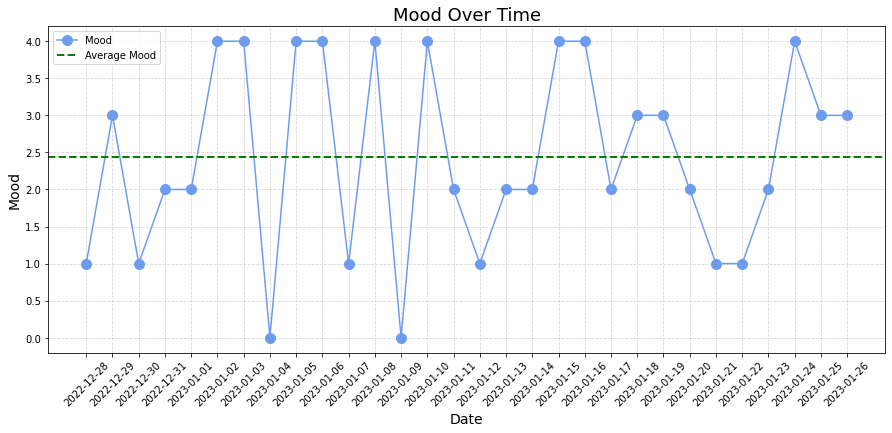

In [5]:
last_month = moods_df[:30]
df = pd.DataFrame({'Mood': last_month['moods'], 'Date': last_month['dates']})

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df['Date'], df['Mood'], color='#6d9cee', marker='o', markersize=10, label='Mood')
ax.axhline(df['Mood'].mean(), color='green', linestyle='--', linewidth=2, label='Average Mood')

ax.set_title('Mood Over Time', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Mood', fontsize=14)
plt.xticks(rotation=45)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.show()


#### Manual data
This second graph uses mood data that felt more natural and shows improvement over time. 

When comparing the two graphs, the first noticable difference is the mood average is higher in the second graph (~2.9 vs ~ 1.8)

The second graph also shows how the mood drastically improved starting from 2023-01-07

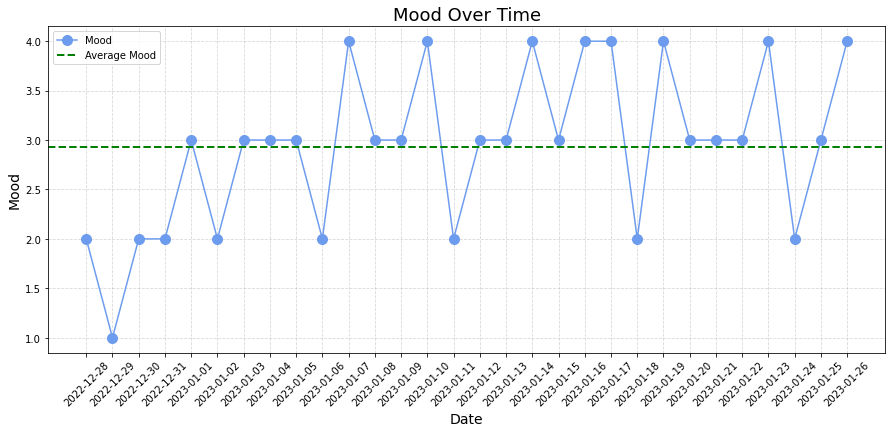

In [6]:
moods_manual = [2, 1, 2, 2, 3, 2, 3, 3, 3, 2, 4, 3, 3, 4, 2,
                3, 3, 4, 3, 4, 4, 2, 4, 3, 3, 3, 4, 2, 3, 4]
dates = pd.date_range(start='2022-01-01', periods=len(moods_manual))

df = pd.DataFrame({'Mood': moods_manual, 'Date': last_month['dates']})

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df['Date'], df['Mood'], color='#6d9cee', marker='o', markersize=10, label='Mood')
ax.axhline(df['Mood'].mean(), color='green', linestyle='--', linewidth=2, label='Average Mood')

ax.set_title('Mood Over Time', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Mood', fontsize=14)
plt.xticks(rotation=45)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.show()
